# Connection to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Prepare the data

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks

def create_all_labels(df):
    #Create a set to avoid redudant values
    all_labels = []
    for index, row in df.iterrows():
      if not row['label'] in all_labels:
        all_labels.append(row['label'])
    return all_labels


#Return 
def split_train_test_data(df, df_test_noaug = False, test_split_size = 0.3, scale = False, pca_value = None, undersampling_method = 'OneSide', tsne = None):
    
    #Get X and Y from the dataframe
    X = df.drop("label", axis=1) # Create a data with all columns except labels
    y = df[["label"]] # Create the labels dataset
    #print(y)

    if tsne != None:
      X_embedded = TSNE(n_components=tsne, init="pca", learning_rate="auto").fit_transform(X.to_numpy())
      for i in range(0,tsne):
        df["tsne_component_"+str(i)]=X_embedded[:,i]

    if undersampling_method == 'OneSide':
      us_method = OneSidedSelection(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'Tomek':
      us_method = TomekLinks(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'Random':
      us_method = RandomUnderSampler(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'NearMiss':
      us_method = NearMiss(version=1, sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'RepeatedEdited':
      us_method = RepeatedEditedNearestNeighbours(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'AllKNN':
      us_method = AllKNN(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'NCleaning':
      us_method = NeighbourhoodCleaningRule(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    if undersampling_method != None:
      df = df.iloc[us_method.sample_indices_.tolist(),:]
      y = df[["label"]]
    
    if df_test_noaug == True:
      test_original_indexes = []
      test_total_indexes = math.floor(df.shape[0] * 0.3)
      while len(test_original_indexes) < test_total_indexes:
        odd_idx = random.randrange(0, df.shape[0], 2)
        if not odd_idx in test_original_indexes:
          test_original_indexes.append(odd_idx)

      rest_indexes = [i for i in range(0, df.shape[0])]
      for i in test_original_indexes:
        rest_indexes.remove(i)
      df_test = df.iloc[test_original_indexes]
      df_train = df.iloc[rest_indexes]
    #mm = MinMaxScaler()
    ss = StandardScaler()
    #Split the data, 
    #train_df, test_df = train_test_split(df, test_size=test_split_size, random_state=42, stratify=y)
    if df_test_noaug == True:
      X_train = df_train.drop("label", axis=1)
      X_test = df_test.drop("label", axis=1)
    else:
      train_df, test_df = train_test_split(df, test_size=test_split_size, random_state=42)
      # Make an instance of the Model
      X_train = train_df.drop("label", axis=1)
      X_test = test_df.drop("label", axis=1)

    if scale == True:
      X_train = ss.fit_transform(X_train)
      X_test = ss.fit_transform(X_test)

    pca = None
    if pca_value != None:
      pca = PCA(pca_value)
      pca.fit(X_train)
      X_train = pca.transform(X_train)
      X_test = pca.transform(X_test)  

    if df_test_noaug == True:
      y_train = df_train[["label"]]
      y_test = df_test[["label"]]
    else:
      y_train = train_df[["label"]]
      y_test = test_df[["label"]]

    #TODO: Pass the data to tensors
    data_xtrain_numpy = X_train.to_numpy() if scale == False else X_train
    data_xtest_numpy = X_test.to_numpy() if scale == False else X_test
    data_ytrain_numpy = y_train.to_numpy()
    data_ytest_numpy = y_test.to_numpy()
    
    return data_xtrain_numpy, data_xtest_numpy, data_ytrain_numpy, data_ytest_numpy, X_train, X_test, y_train, y_test, pca

def split_train_test_data_files(df_train, df_test, scale = False, pca_value = None, undersampling_method = 'OneSide'):
    
    #Get X and Y from the dataframe
    X = df_train.drop("label", axis=1) # Create a data with all columns except labels
    y = df_train[["label"]] # Create the labels dataset
    #print(y)

    if undersampling_method == 'OneSide':
      us_method = OneSidedSelection(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'Tomek':
      us_method = TomekLinks(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'Random':
      us_method = RandomUnderSampler(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'NearMiss':
      us_method = NearMiss(version=1, sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'RepeatedEdited':
      us_method = RepeatedEditedNearestNeighbours(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'AllKNN':
      us_method = AllKNN(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'NCleaning':
      us_method = NeighbourhoodCleaningRule(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    if undersampling_method != None:
      df_train = df_train.iloc[us_method.sample_indices_.tolist(),:]
      y = df_train[["label"]]
    
    ss = StandardScaler()
    #Split the data, 
    # Make an instance of the Model
    X_train = df_train.drop("label", axis=1)
    X_test = df_test.drop("label", axis=1)

    if scale == True:
      X_train = ss.fit_transform(X_train)
      X_test = ss.fit_transform(X_test)

    pca = None
    if pca_value != None:
      pca = PCA(pca_value)
      pca.fit(X_train)
      X_train = pca.transform(X_train)
      X_test = pca.transform(X_test)  

    y_train = df_train[["label"]]
    y_test = df_test[["label"]]

    #TODO: Pass the data to tensors
    data_xtrain_numpy = X_train.to_numpy() if scale == False else X_train
    data_xtest_numpy = X_test.to_numpy() if scale == False else X_test
    data_ytrain_numpy = y_train.to_numpy()
    data_ytest_numpy = y_test.to_numpy()

    return data_xtrain_numpy, data_xtest_numpy, data_ytrain_numpy, data_ytest_numpy, X_train, X_test, y_train, y_test, pca

def split_train_validation_test_data(df_train, df_validation, df_test, scale = False, pca_value = None, undersampling_method = 'OneSide'):
    
    #Get X and Y from the dataframe
    X = df_train.drop("label", axis=1) # Create a data with all columns except labels
    y = df_train[["label"]] # Create the labels dataset
    #print(y)

    if undersampling_method == 'OneSide':
      us_method = OneSidedSelection(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'Tomek':
      us_method = TomekLinks(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'Random':
      us_method = RandomUnderSampler(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'NearMiss':
      us_method = NearMiss(version=1, sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'RepeatedEdited':
      us_method = RepeatedEditedNearestNeighbours(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'AllKNN':
      us_method = AllKNN(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    elif undersampling_method == 'NCleaning':
      us_method = NeighbourhoodCleaningRule(sampling_strategy='majority')
      X_us, y_us = us_method.fit_resample(X, y)
    if undersampling_method != None:
      df_train = df_train.iloc[us_method.sample_indices_.tolist(),:]
      y = df_train[["label"]]
    
    ss = StandardScaler()
    #Split the data, 
    # Make an instance of the Model
    X_train = df_train.drop("label", axis=1)
    X_validation = df_validation.drop("label", axis=1)
    X_test = df_test.drop("label", axis=1)

    if scale == True:
      X_train = ss.fit_transform(X_train)
      X_validation = ss.fit_transform(X_validation)
      X_test = ss.fit_transform(X_test)

    pca = None
    if pca_value != None:
      pca = PCA(pca_value)
      pca.fit(X_train)
      X_train = pca.transform(X_train)
      X_validation = pca.transform(X_validation)  
      X_test = pca.transform(X_test)  

    y_train = df_train[["label"]]
    y_validation = df_validation[["label"]]
    y_test = df_test[["label"]]

    #TODO: Pass the data to tensors
    data_xtrain_numpy = X_train.to_numpy() if scale == False else X_train
    data_xvalidation_numpy = X_validation.to_numpy() if scale == False else X_validation
    data_xtest_numpy = X_test.to_numpy() if scale == False else X_test
    data_ytrain_numpy = y_train.to_numpy()
    data_yvalidation_numpy = y_validation.to_numpy()
    data_ytest_numpy = y_test.to_numpy()

    return data_xtrain_numpy, data_xvalidation_numpy, data_xtest_numpy, data_ytrain_numpy, data_yvalidation_numpy, data_ytest_numpy, pca
  
def generate_features_label_tensors(features, label, all_labels, dtype = torch.double):
    features_data_tensor = torch.zeros(1, len(features), dtype=dtype)
    for i, feature in enumerate(features):
        features_data_tensor[0][i] = feature
    label_data_tensor = torch.tensor([all_labels.index(label)], dtype=torch.long)
    return features_data_tensor, label_data_tensor

def generate_labels_encoding(labels, all_labels):
    labels_encoded = []
    for label in labels:
        labels_encoded.append(all_labels.index(label))
    return labels_encoded

#word from output util function
def words_from_output(output, all_labels):
    label_idx = torch.argmax(output).item()
    return all_labels[label_idx]

def get_label_index(label, all_labels):
    try:
      return all_labels.index(label)
    except ValueError:
      return None


#LSTM Class

In [ ]:
import torch 
import torch.nn as nn
# Bidirectional recurrent neural network (many-to-one)
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, device):
        super(BiLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.device = device
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True, device=self.device)
        self.fc = nn.Linear(hidden_size*2, num_classes, device=self.device)  # 2 for bidirection
        self.double()
    
    def forward(self, x):
        # Set initial states
        
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size, dtype=torch.double).to(self.device) # 2 for bidirection 
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size, dtype=torch.double).to(self.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size*2)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Training with cross validation

In [ ]:
class SaveBestModel:
    """
    Class to save the best model while training. If the current epoch's 
    validation loss is less than the previous least less, then save the
    model state.
    """
    def __init__(self, best_valid_loss=float('inf')):
        self.best_valid_loss = best_valid_loss
        
    def __call__(self, current_valid_loss, epoch, model, optimizer, criterion, directory, fold):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                }, directory + 'fold_'+str(fold)+'_best_model.pth')
            
def save_model(epochs, model, optimizer, criterion, directory, fold):
    """
    Function to save the trained model to disk.
    """
    #print(f"Saving final model...")
    torch.save({
                'epoch': epochs,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                }, directory + 'fold_'+str(fold)+'_final_model.pth')

def save_plots(train_acc, valid_acc, train_loss, valid_loss, directory, undersampling, fold):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    if valid_acc != None:
      plt.plot(
          valid_acc, color='blue', linestyle='-', 
          label='validataion accuracy'
      )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy, undersampling {undersampling}, fold {fold}')
    plt.savefig(directory + 'fold_'+str(fold)+'_accuracy.png')
    
    # loss plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    if valid_loss != None:
      plt.plot(
          valid_loss, color='red', linestyle='-', 
          label='validataion loss'
      )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss, undersampling {undersampling}, fold {fold}')
    plt.savefig(directory + 'fold_'+str(fold)+'_loss.png')

In [ ]:
import torch.optim as optim

def training(input_size, hidden_size, num_layers, num_classes, device, learning_rate,
             data_xtrain_numpy,data_ytrain_numpy,data_xvalidation_numpy,data_yvalidation_numpy, undersampling, fold, all_labels, directory, batch_size=50):
  
  all_losses = []
  all_losses_test = []
  train_acc, valid_acc = [], []
  scheduler_factor = 0.1
  scheduler_patience = 5

  model = BiLSTM(input_size, hidden_size, num_layers, num_classes, device)

  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=scheduler_factor, patience=scheduler_patience, verbose=True)
  # initialize SaveBestModel class
  save_best_model = SaveBestModel()

  # Train the model
  N_rows = len(data_xtrain_numpy)
  size_step = math.ceil(len(data_xtrain_numpy) / batch_size)

  for epoch in range(num_epochs):
      model.train(True)
      current_loss = 0
      train_running_correct = 0
      for i in range(0, size_step): 
          lower_idx = i * batch_size
          upper_idx = (i+1) * batch_size if ((i+1) * batch_size) < N_rows else N_rows

          features_data_tensor = torch.from_numpy(data_xtrain_numpy[lower_idx:upper_idx]).to(device)
          labels_encoded = generate_labels_encoding(data_ytrain_numpy[lower_idx:upper_idx], all_labels)
          data_y = data_ytrain_numpy[lower_idx:upper_idx]
          labels_data_tensor = torch.from_numpy(np.array(labels_encoded)).to(device)

          #reshaping to rows, timestamps, features
          X_train_tensors_final = torch.reshape(features_data_tensor,   (features_data_tensor.shape[0], 1, features_data_tensor.shape[1]))
          
          # Forward pass
          outputs = model(X_train_tensors_final)
          loss = criterion(outputs, labels_data_tensor)

          # Backward and optimize
          optimizer.zero_grad()
          current_loss += loss.item()

          # calculate the accuracy
          _, preds = torch.max(outputs.data, 1)
          train_running_correct += (preds == labels_data_tensor).sum().item()

          loss.backward()
          optimizer.step()

          #scheduler.step(current_loss / size_step)
      epoch_loss = current_loss / size_step
      epoch_acc = 100. * (train_running_correct / len(data_xtrain_numpy))
      all_losses.append(epoch_loss)
      train_acc.append(epoch_acc)
      
      if data_xvalidation_numpy != None:
        model.train(False)
        size_step_test = math.ceil(len(data_xvalidation_numpy) / batch_size)
        N_rows_test = len(data_xvalidation_numpy)
        running_vloss = 0.0
        valid_running_correct = 0
        for i in range(0, size_step_test): #hay que hacer esto por batch, la shape tiene que ser (batch, 1 (seq_length), features)
            lower_idx = i * batch_size
            upper_idx = (i+1) * batch_size if ((i+1) * batch_size) < N_rows_test else N_rows_test
            
            features_data_tensor = torch.from_numpy(data_xvalidation_numpy[lower_idx:upper_idx]).to(device)
            labels_encoded = generate_labels_encoding(data_yvalidation_numpy[lower_idx:upper_idx], all_labels)
            data_y = data_yvalidation_numpy[lower_idx:upper_idx]
            labels_data_tensor = torch.from_numpy(np.array(labels_encoded)).to(device)

            #reshaping to rows, timestamps, features
            X_test_tensors_final = torch.reshape(features_data_tensor,   (features_data_tensor.shape[0], 1, features_data_tensor.shape[1]))
            #print(f'features shape after reshape {X_train_tensors_final.shape}')

            # Forward pass
            voutputs = model(X_test_tensors_final)
            vloss = criterion(voutputs, labels_data_tensor)
            running_vloss += vloss.item()

            # calculate the accuracy
            _, preds = torch.max(voutputs.data, 1)
            valid_running_correct += (preds == labels_data_tensor).sum().item()

            #scheduler.step(running_vloss / size_step_test)

      if data_xvalidation_numpy != None:
        epoch_acc = 100. * (valid_running_correct / len(data_xtrain_numpy))  
        valid_acc.append(epoch_acc)
        epoch_loss = running_vloss / size_step_test
        all_losses_test.append(epoch_loss)
      
      #all_accuracies.append(test(model, data_xtrain_numpy, data_ytrain_numpy, all_labels, device))
      #print(all_accuracies)

      save_best_model(epoch_loss, epoch, model, optimizer, loss, directory, fold)
  
  # save the trained model weights for a final time
  save_model(num_epochs, model, optimizer, loss, directory, fold)
  # save the loss and accuracy plots
  save_plots(train_acc, valid_acc, all_losses, all_losses_test, directory, undersampling, fold)

  return model

In [ ]:
def test(model, data_xtest_numpy, data_ytest_numpy, all_labels, device):
  confusion = torch.zeros(len(all_labels), len(all_labels))
  correct_guesses = 0

  # Go through a bunch of examples and record which are correctly guessed
  for i, data_xtest in enumerate(data_xtest_numpy):
      with torch.no_grad():
          data_ytest = data_ytest_numpy[i]
          features_data_tensor, label_data_tensor = generate_features_label_tensors(data_xtest, data_ytest, all_labels)
          #Reshape features tensor
          X_test_tensors_final = torch.reshape(features_data_tensor, (features_data_tensor.shape[0], 1, features_data_tensor.shape[1])).to(device)
          output = model(X_test_tensors_final)
          guess = words_from_output(output, all_labels)
          #print(guess)
          #category_i = np.where(unique_test_elements == data_ytest)[0][0]
          category_i = all_labels.index(data_ytest)
          #print(np.where(unique_test_elements == guess))
          #guess_i = np.where(unique_test_elements == guess)[0][0]
          guess_i = all_labels.index(guess)
          confusion[category_i][guess_i] += 1
          correct_guesses = (correct_guesses + 1) if category_i == guess_i else correct_guesses

  accuracy = (correct_guesses/len(data_xtest_numpy))*100
  #print(f'Total: {len(data_xtest_numpy)}, Correct: {correct_guesses}')
  #print(f'Accuracy validation data: {accuracy}%')
  #for i in range(len(all_labels)):
  #  print(f'Accuracy label {all_labels[i]} "({confusion[i].sum()})" : {(confusion[i][i]/confusion[i].sum())*100}%')

  return accuracy

def test_last_model(model, checkpoint, data_xtest_numpy, data_ytest_numpy, all_labels, device):
    #print('Loading last epoch saved model weights...')
    model.load_state_dict(checkpoint['model_state_dict'])
    test_acc = test(model, data_xtest_numpy, data_ytest_numpy, all_labels, device)
    #print(f"Last epoch saved model accuracy: {test_acc:.3f}")
    return test_acc

def test_best_model(model, checkpoint, data_xtest_numpy, data_ytest_numpy, all_labels, device):
    #print('Loading best epoch saved model weights...')
    model.load_state_dict(checkpoint['model_state_dict'])
    test_acc = test(model, data_xtest_numpy, data_ytest_numpy, all_labels, device)
    #print(f"Best epoch saved model accuracy: {test_acc:.3f}")
    return test_acc

/content/gdrive/My Drive/Doctorado/Programa Tesis/R scripts/All_Vocab_28112022_transitions - 07042023.xlsx
Best model was saved at 48 epochs

Last model was saved at 50 epochs

Best model was saved at 46 epochs

Last model was saved at 50 epochs

Best model was saved at 44 epochs

Last model was saved at 50 epochs

Best model was saved at 46 epochs

Last model was saved at 50 epochs

Best model was saved at 50 epochs

Last model was saved at 50 epochs

Best model was saved at 49 epochs

Last model was saved at 50 epochs

Best model was saved at 46 epochs

Last model was saved at 50 epochs

Best model was saved at 50 epochs

Last model was saved at 50 epochs

Best model was saved at 50 epochs

Last model was saved at 50 epochs

Best model was saved at 49 epochs

Last model was saved at 50 epochs



<ipython-input-17-10260349df47>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 7))


Best model was saved at 45 epochs

Last model was saved at 50 epochs

Best model was saved at 48 epochs

Last model was saved at 50 epochs



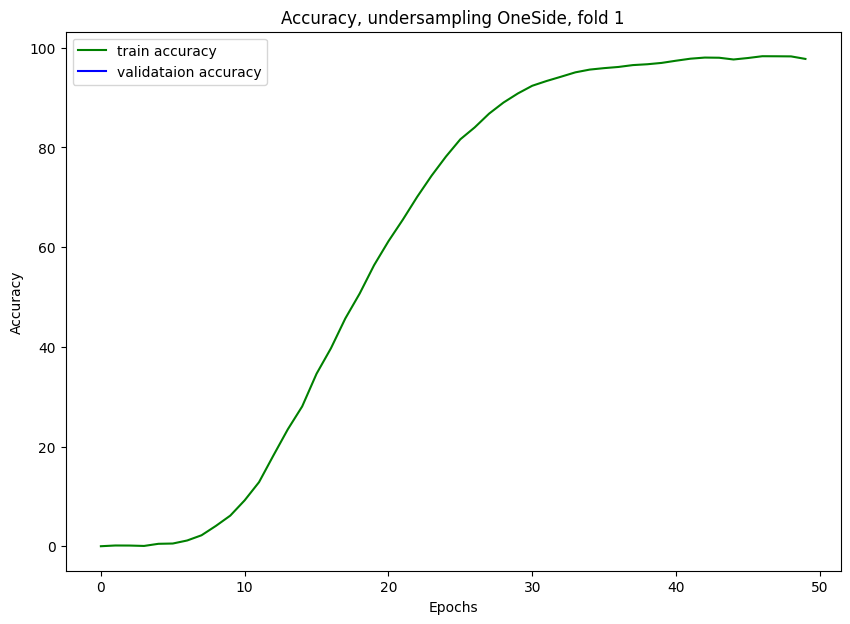

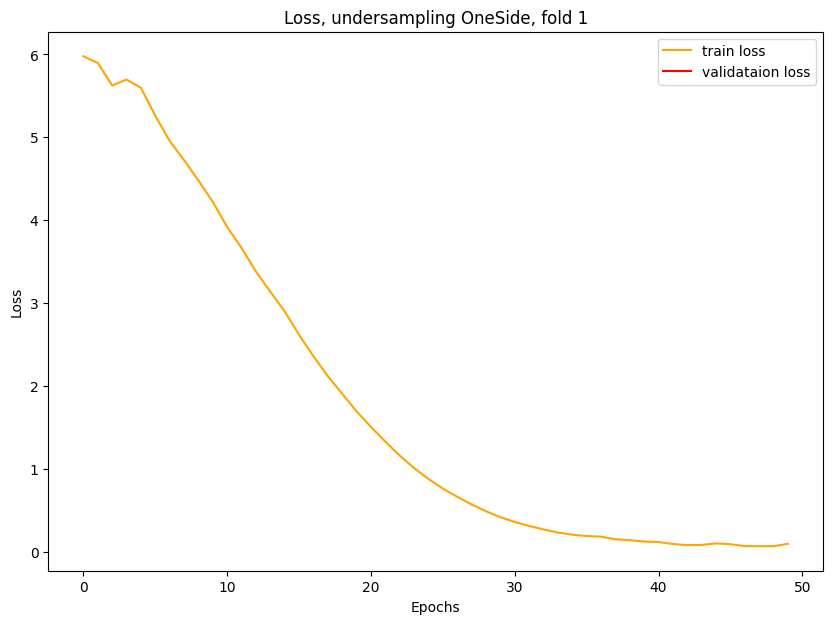

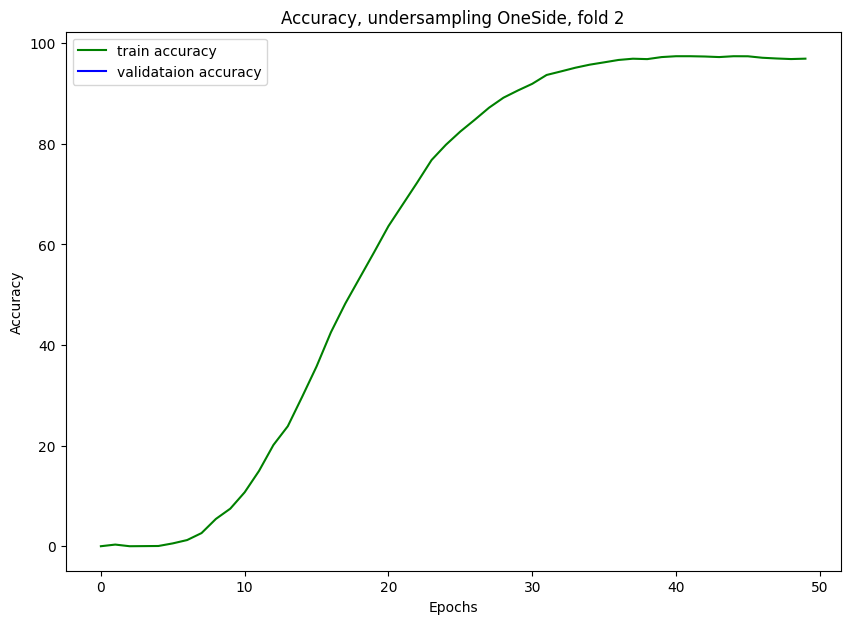

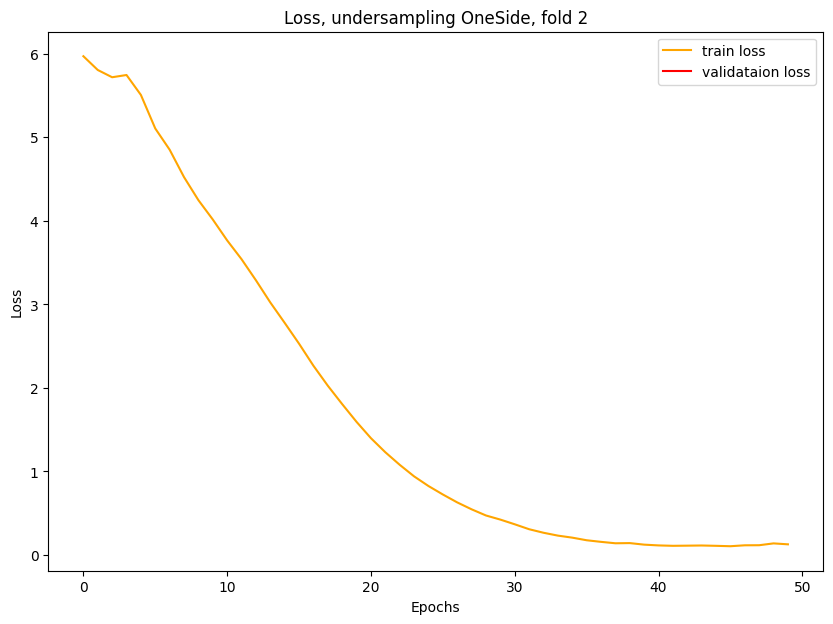

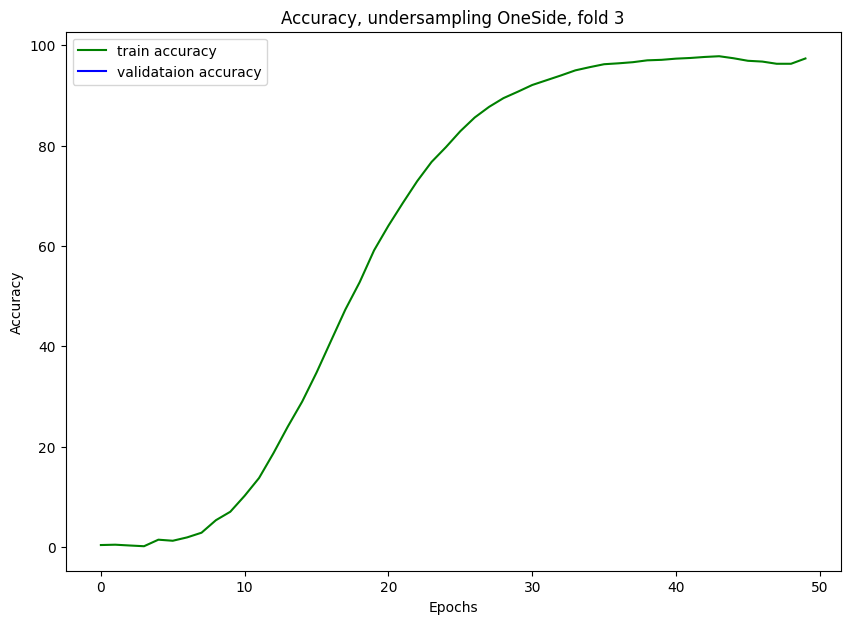

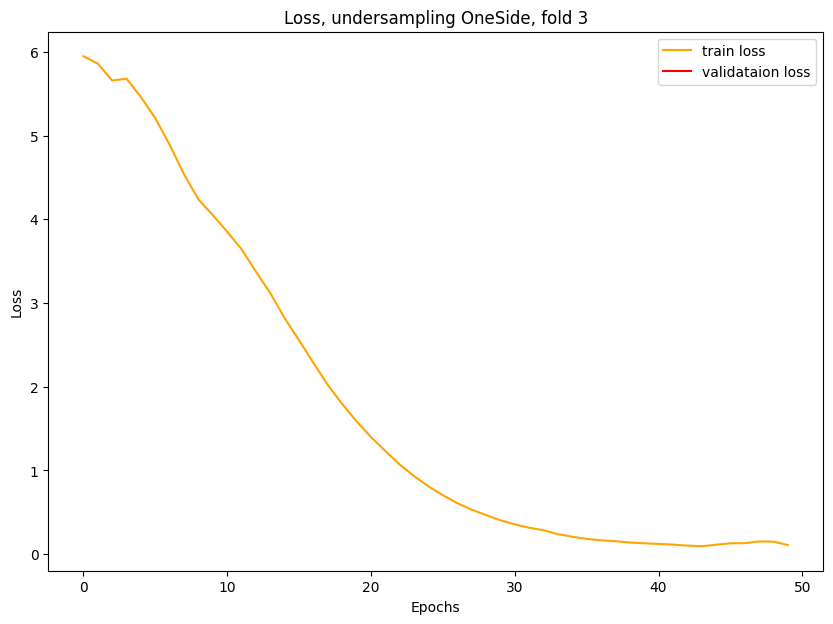

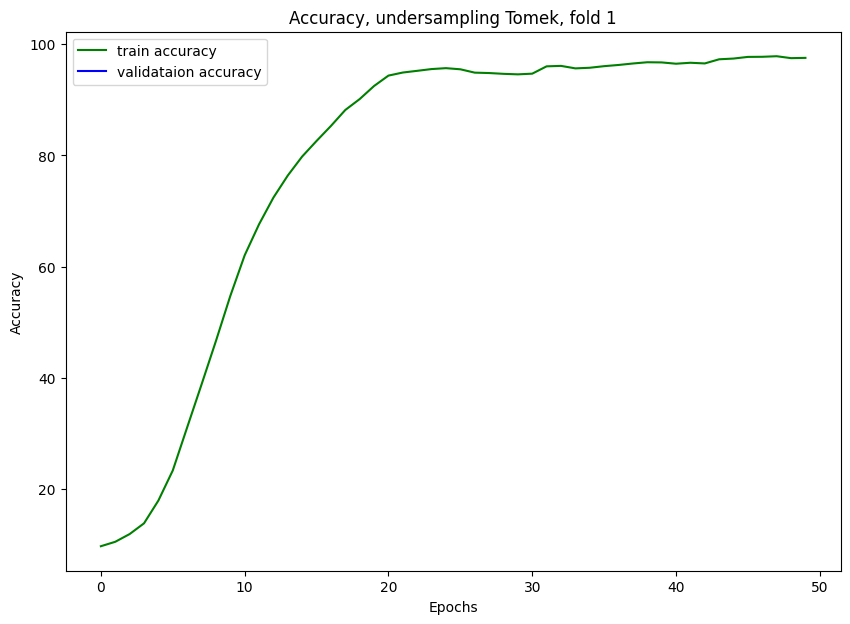

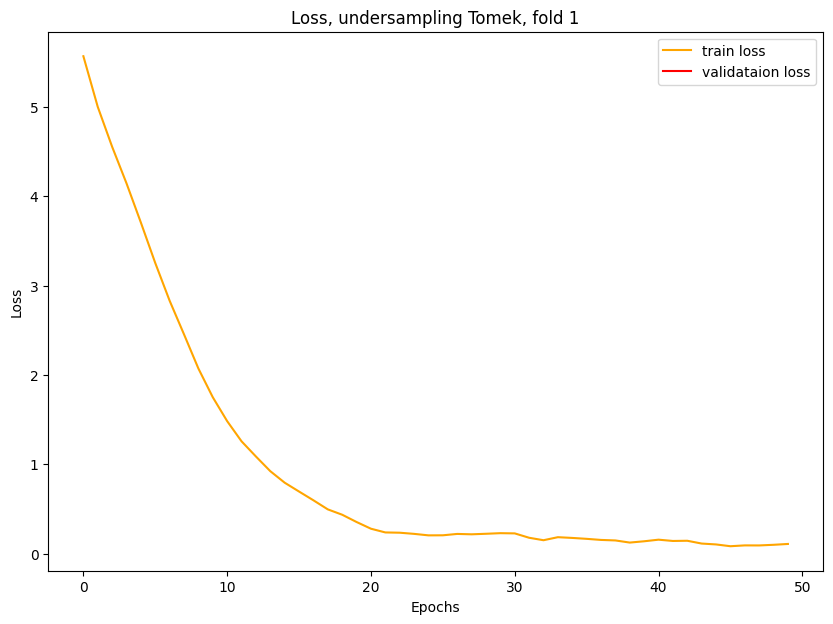

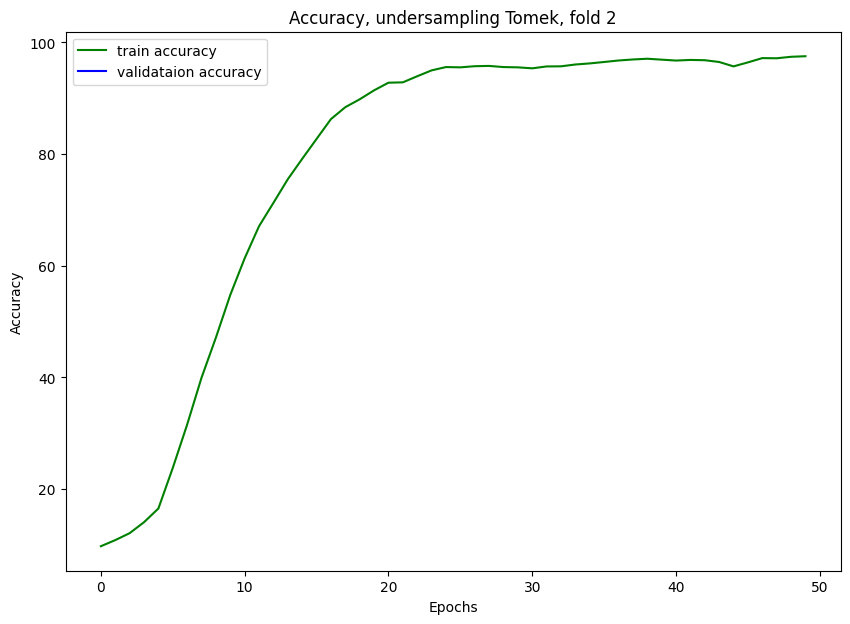

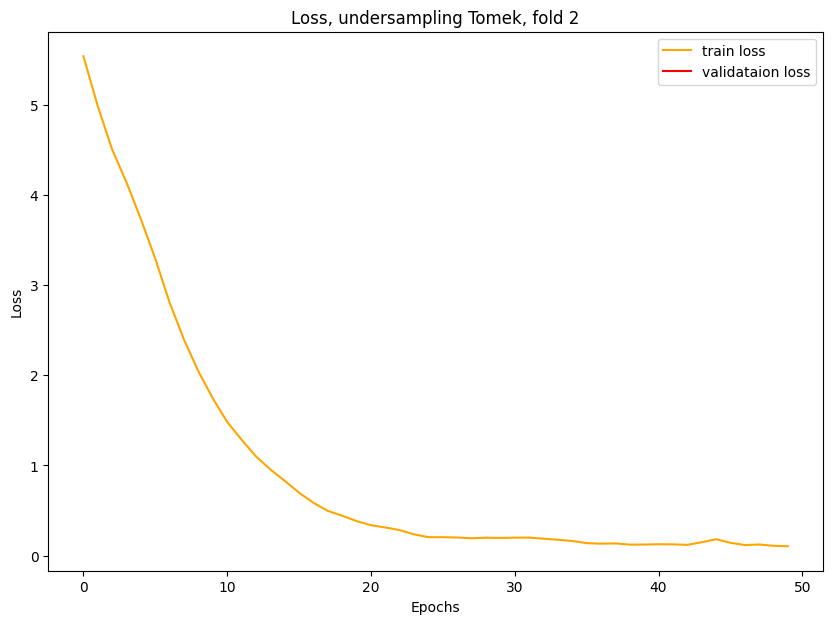

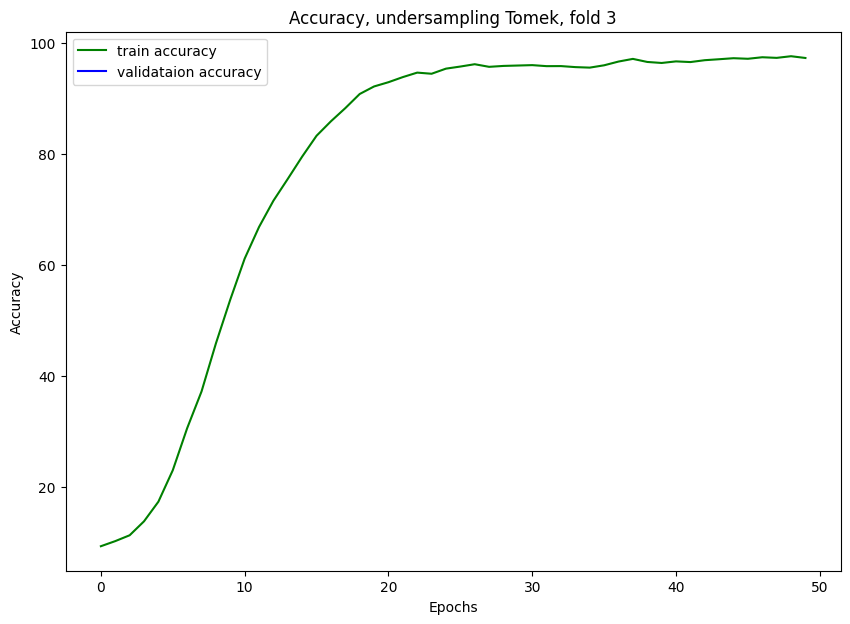

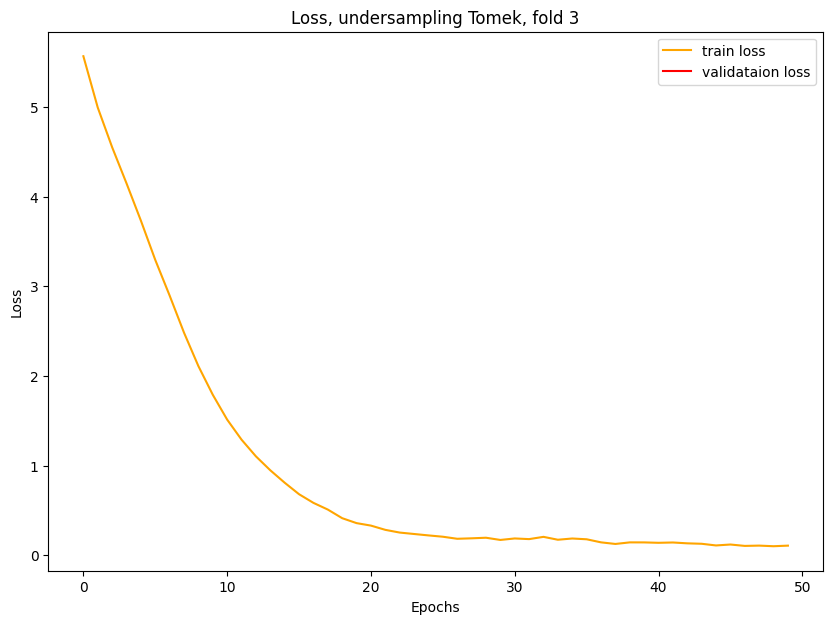

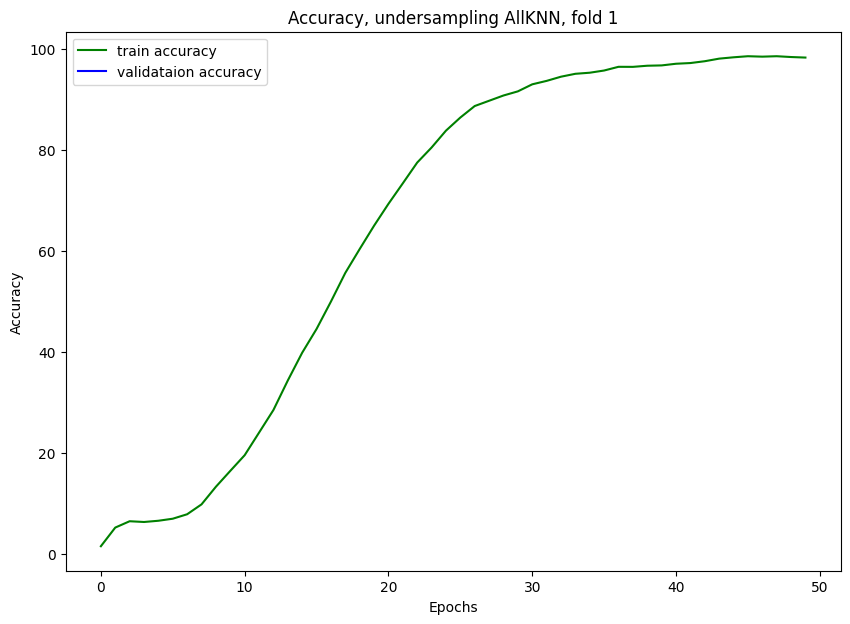

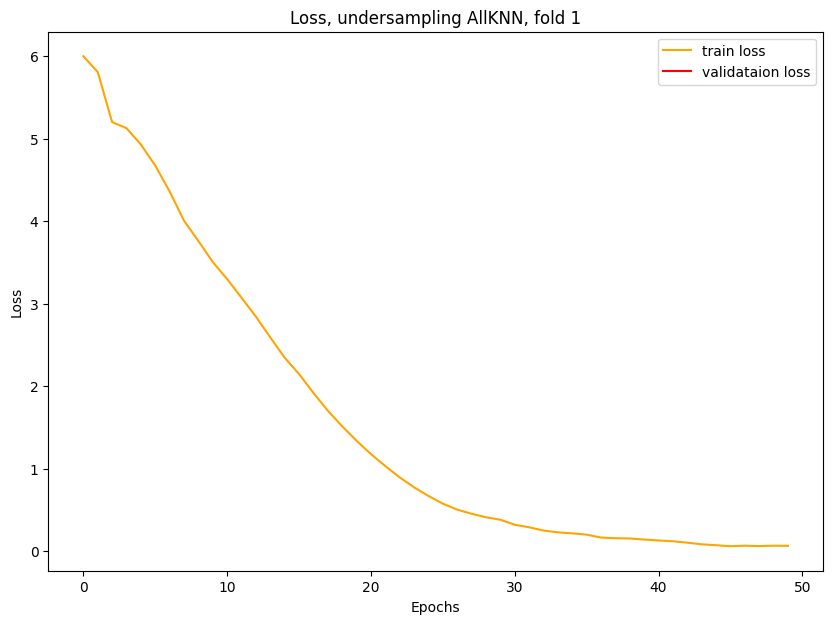

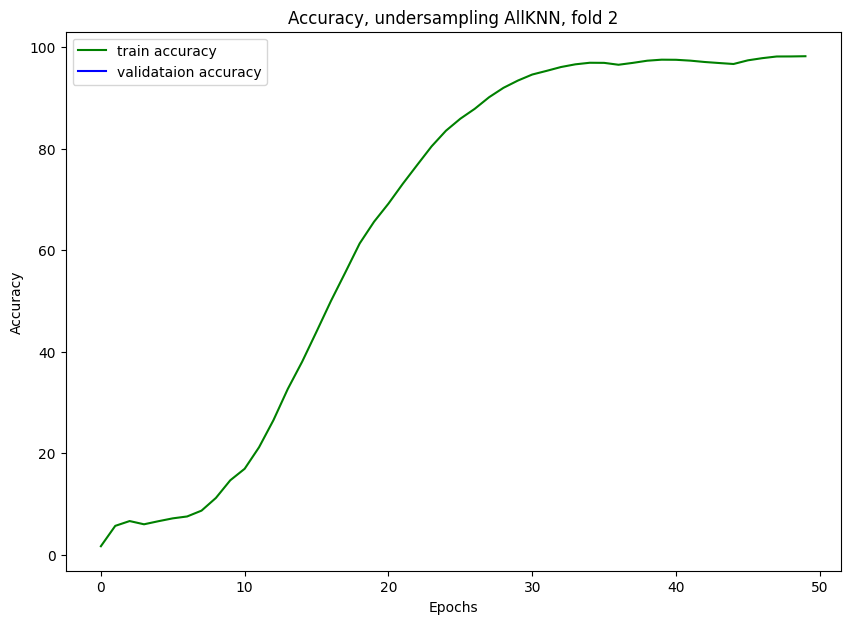

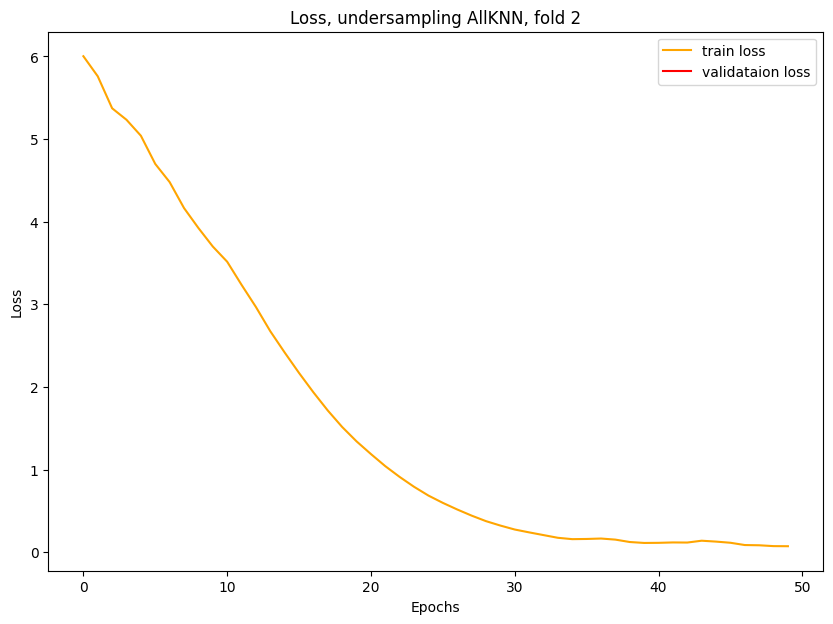

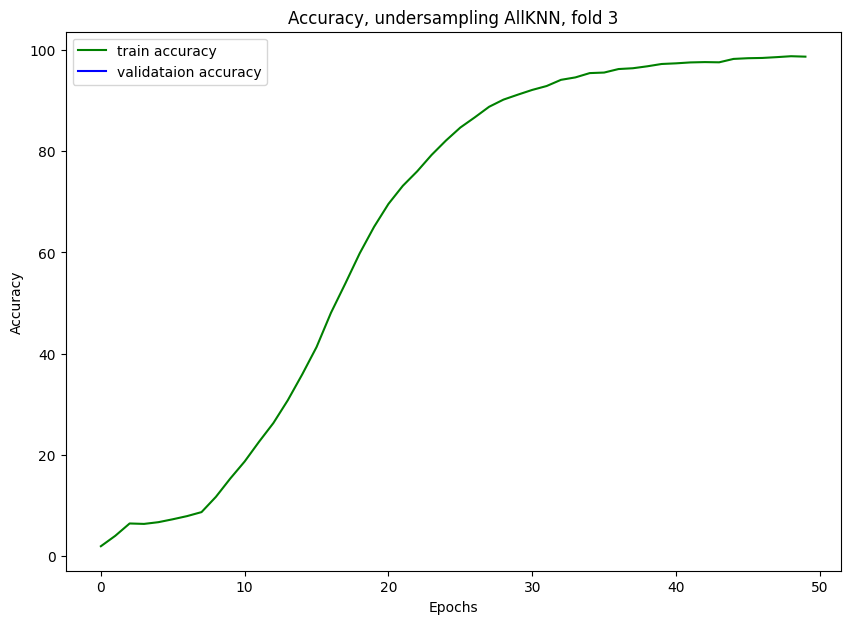

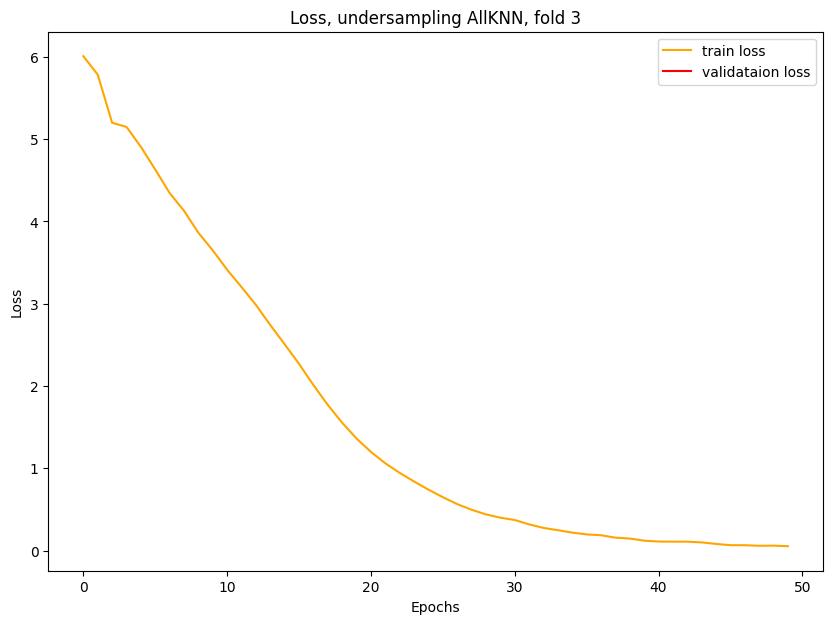

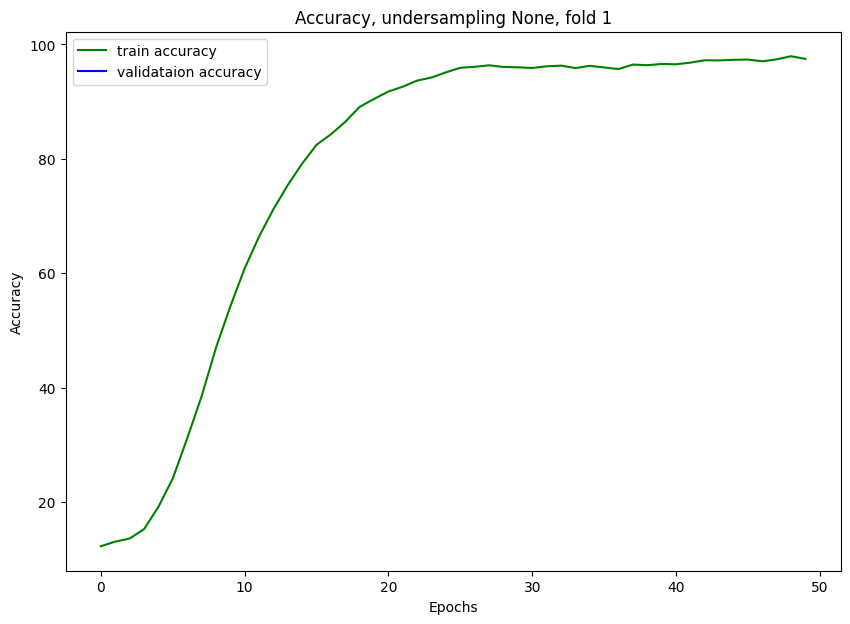

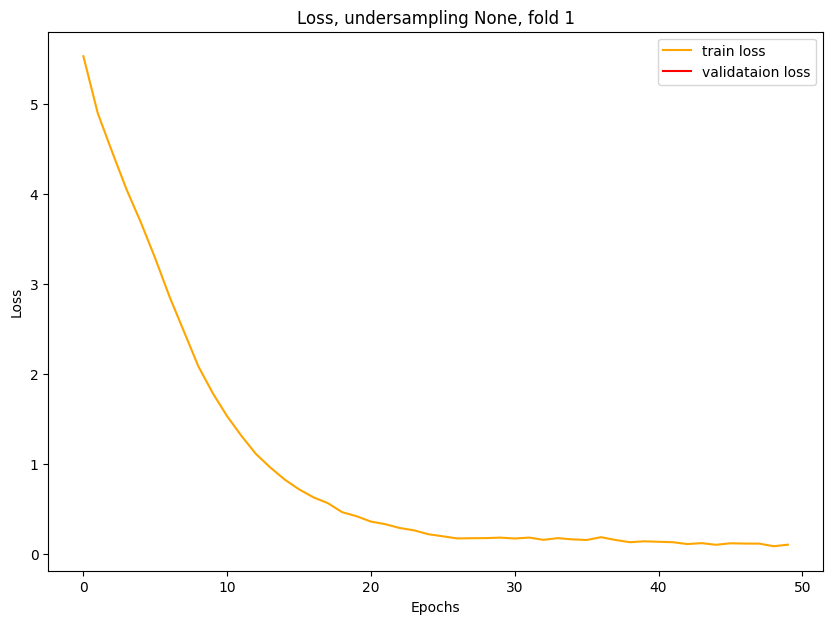

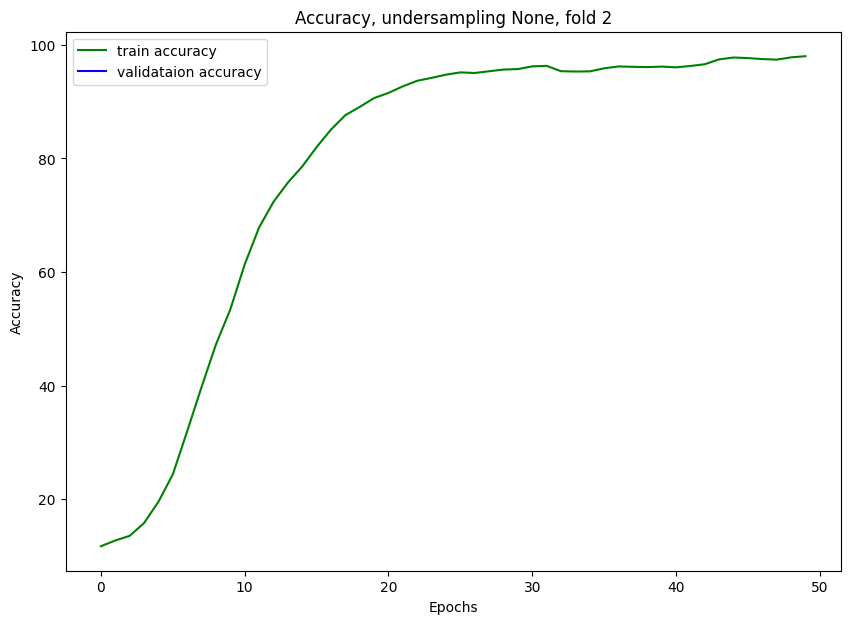

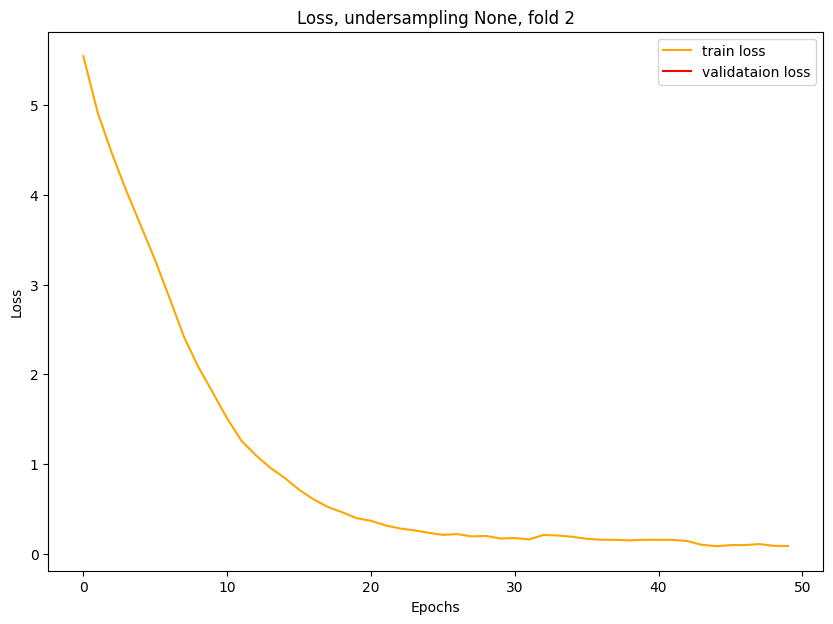

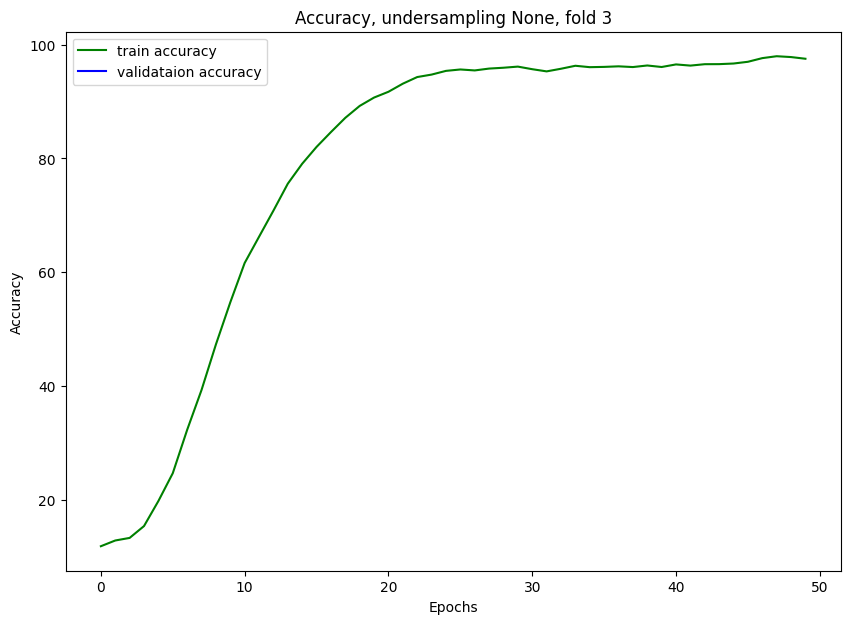

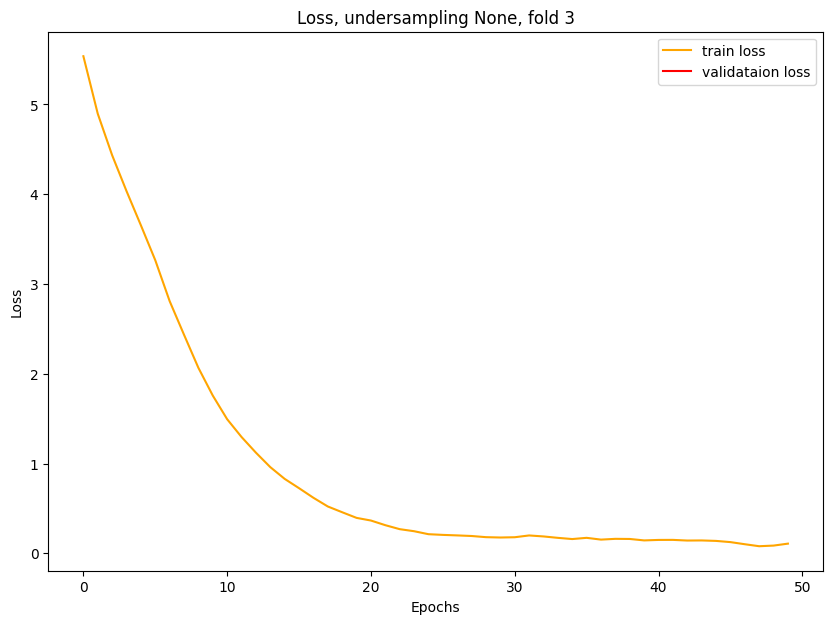

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
import datetime
from pathlib import Path

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
#sequence_length = 28
hidden_size = 128
num_layers = 2
batch_size = 50
num_epochs = 50
learning_rate = 0.003
k_folds = 3

# Arrays to store the results
video_str = []
fold_1_best, fold_1_last = [], []
fold_2_best, fold_2_last = [], []
fold_3_best, fold_3_last = [], []
us_arr = []

# assign directory
directory = '/content/gdrive/My Drive/your_directory/LIBRAS Data/'
now = datetime.datetime.now()
experiment_directory = '/content/gdrive/My Drive/your_directory/LIBRAS Data/Experiments/' + str(now)
Path(experiment_directory).mkdir(parents=True, exist_ok=True)
Path(experiment_directory + '/outputs/').mkdir(parents=True, exist_ok=True)
 
# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and ('All_Vocab.xlsx' in f):
        df = pd.read_excel(f, index_col=0)
        
        #Generate labels
        all_labels = create_all_labels(df[["label"]])

        undersampling_methods = ['OneSide', 'Tomek', 'AllKNN', None]
        for undersampling_method in undersampling_methods:
          undersampling_directory = experiment_directory + "/outputs/" + undersampling_method + "/" if undersampling_method != None else experiment_directory + "/outputs/None/"
          Path(undersampling_directory).mkdir(parents=True, exist_ok=True)
          video_str.append(f)
          us_arr.append(undersampling_method)
          for fold in range(k_folds):
            #print(f'Undersampling method: {undersampling_method}, Fold: {(int(fold)+1)}')
            data_xtrain_numpy, data_xtest_numpy, data_ytrain_numpy, data_ytest_numpy, X_train, X_test, y_train, y_test, pca = split_train_test_data(df, df_test_noaug=True, test_split_size = 0.3, scale = True, pca_value = 0.95, undersampling_method = undersampling_method, tsne = None)

            N_features = len(data_xtrain_numpy[0])
            input_size = N_features #Tamaño del numero de caracteristicas
            num_classes = len(all_labels) #Aqui es el numero de labels
            
            #Model Training
            
            model = training(input_size, hidden_size, num_layers, num_classes, device, learning_rate,data_xtrain_numpy,data_ytrain_numpy,None,None,undersampling_method, (fold+1), all_labels, undersampling_directory)

            #Testing Model
            best_model_cp = torch.load(undersampling_directory + 'fold_'+str(fold+1)+'_best_model.pth')
            best_model_epoch = best_model_cp['epoch']
            print(f"Best model was saved at {best_model_epoch} epochs\n")
            # load the last model checkpoint
            last_model_cp = torch.load(undersampling_directory + 'fold_'+str(fold+1)+'_final_model.pth')
            last_model_epoch = last_model_cp['epoch']
            print(f"Last model was saved at {last_model_epoch} epochs\n")
            accuracy_last = test_last_model(model, last_model_cp, data_xtest_numpy, data_ytest_numpy, all_labels, device)
            accuracy_best = test_best_model(model, best_model_cp, data_xtest_numpy, data_ytest_numpy, all_labels, device)
            if fold == 0:
              fold_1_last.append(accuracy_last)
              fold_1_best.append(accuracy_best)
            elif fold == 1:
              fold_2_last.append(accuracy_last)
              fold_2_best.append(accuracy_best)
            elif fold == 2:
              fold_3_last.append(accuracy_last)
              fold_3_best.append(accuracy_best)

df_save_results = pd.DataFrame()
# append columns to an empty DataFrame
df_save_results['Video'] = video_str
df_save_results['Undersampling'] = us_arr
df_save_results['Fold 1 Best'] = fold_1_best
df_save_results['Fold 1 Last'] = fold_1_last
df_save_results['Fold 2 Best'] = fold_2_best
df_save_results['Fold 2 Last'] = fold_2_last
df_save_results['Fold 3 Best'] = fold_3_best
df_save_results['Fold 3 Last'] = fold_3_last

df_save_results.to_excel(experiment_directory + "/All_results_bilstm_3folds_50epochs.xlsx")